## **Role Models**
Presented by Aldrin G. Hsu, Wesley Brian T. Sy, and Gian Martin C. Carlos



In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Dataset Overview**  
The dataset includes national-level data from the Philippines showcasing the **percentage share of total family income and total family expenditure**, disaggregated by **each region, province, and highly urbanized city (HUC)** for the years **2018**, **2021**, and **2023**. These figures allow for data analysis in the trends of income distribution and household spending behavior across each geographic locations and time period in the Philippines.

---

### **How the Dataset Was Collected**  
The dataset was collected by the **Philippine Statistics Authority (PSA)** as part of their **Family Income and Expenditure Survey (FIES)**. The FIES is conducted every three years using techniques such as probability sampling to gather economic data across the country. The Surveys are administered in person by PSA field staffs.

---

### **Potential Implications of Data Collection**  
Since the survey relies on **self-reported data**, responses may be affected by **recall bias or underreporting**, especially on sensitive financial matters. Additionally, regions that are remote and households in the informal sector may have underpresented and inconsistent data due to logistical, economic, and social reasons. Factors such as these mentioned can affect the accuracy and generalizability of the income and expenditure shares reported in the dataset.

---

### **Structure of the Data**  
The dataset is **structured and tabular**.

Each **row** represents:  
- A specific **geographical unit** (Region, Province, or HUC) for a **specific year** (2018, 2021, or 2023).

Each **column** represents:  
- Either a share of **total income** (Table 6) or **total expenditure** (Table 7).

**Total Number of Observations**:  
- Varies based on the number of geographic units reported for each year.

**Attributes/Features Present**:  
- `Year` – The survey year  
- `Geographic_Unit` – Region/Province/HUC  
- `Income_Share` – % share to total national income  
- `Expenditure_Share` – % share to total national expenditure

---

### **Brief Description of the Attributes**

| Attribute Name            | Description |
|---------------------------|-------------|
| `Year`                    | Survey year (2018, 2021, or 2023) |
| `Region`                  | Name of the region (e.g., NCR, Region IV-A) |
| `Province` / `HUC`        | Name of the province or highly urbanized city |
| `Income_Share (%)`        | Share of the geographic unit to the total national family income |
| `Expenditure_Share (%)`   | Share of the geographic unit to the total national family expenditure |

In [337]:
#dfIncome = pd.read_excel("Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC.xlsx", engine="openpyxl")
#dfExpenditure = pd.read_excel("Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC.xlsx", engine="openpyxl")

In [338]:
#dfIncome.head(10)
#dfExpenditure.head(10)

### **Data Cleaning**
As seen in the dataframe above, there are unnecessary NaNs due to the way the files are formatted. To make the data easier to read and clean, we split the two datasets into six CSV files. The data in the files are based on whether they are for Income or Expenditure and based on their year (2018, 2021, or 2023). Note that we did not make new CSV files for Percentage Point Change since those values could be derived using the yearly data.

In [339]:
#Uncomment if using Google Colab
#from google.colab import drive
#drive.mount('/content/drive')
#Income18 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I18.csv")
#Income21 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I21.csv")
#Income23 = pd.read_csv("/content/drive/MyDrive/CSMODEL/I23.csv")
#Expenditure18 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E18.csv")
#Expenditure21 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E21.csv")
#Expenditure23 = pd.read_csv("/content/drive/MyDrive/CSMODEL/E23.csv")

#Table 6. 2018, 2021 and 2023p Share to Total Annual Family Income, by Region, Province and HUC
Income18 = pd.read_csv("I18.csv")
Income21 = pd.read_csv("I21.csv")
Income23 = pd.read_csv("I23.csv")

#Table 7. 2018, 2021 and 2023p Share to Total Family Expenditure, by Region, Province and HUC
Expenditure18 = pd.read_csv("E18.csv")
Expenditure21 = pd.read_csv("E21.csv")
Expenditure23 = pd.read_csv("E23.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You may use this code block to see the data of one of our dataframes.

In [340]:
#Initial state of the dataset
#Income18.head(10)
#Income21.head(10)
#Income23.head(10)

Expenditure18.head(10)
#Expenditure21.head(10)
#Expenditure23.head(10)

,Unnamed: 0,PHILIPPINES,NATIONAL CAPITAL REGION,City of Manila,City of Mandaluyong,City of San Juan,Quezon City,City of Marikina,City of Pasig,City of Caloocan,...,Dinagat Islands,BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,Basilan,Lanao Del Sur,Maguindanao,Maguindanao del Sur,Maguindanao del Norte,Sulu,Tawi-Tawi,Cotabato City
0,Share to Family Expenditure,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,NaN,NaN,100.0,100.0,100.0
1,Food and Non-Alcoholic Beverages,42.6,38.1,42.5,35.3,34.2,36.7,35.9,38.8,44.5,...,45.9,59.9,58.5,59.5,59.3,NaN,NaN,66.0,61.0,53.4
2,Food Consumed at Home,33.6,26.2,27.1,22.3,22.0,25.0,24.1,27.1,31.8,...,43.0,54.0,53.6,53.6,50.9,NaN,NaN,65.3,59.6,43.4
3,Food Regularly Consumed Outside the Home,9.0,12.0,15.4,13.1,12.1,11.7,11.8,11.7,12.8,...,2.9,5.8,4.9,5.9,8.4,NaN,NaN,0.7,1.4,10.0
4,Service for Processing Primary Goods for F...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,NaN,NaN,-,-,-
5,Alcoholic Beverages and Tobacco,1.8,1.5,1.6,1.1,1.1,1.6,1.5,1.5,2.0,...,1.4,1.6,1.7,1.4,2.1,NaN,NaN,1.3,1.2,1.0
6,Clothing and Footwear,2.6,2.1,2.1,2.2,2.2,2.0,1.7,2.7,1.8,...,3.4,2.5,2.8,2.5,2.6,NaN,NaN,2.3,3.1,2.1
7,"Housing, Water, Electricity, Gas and Other Fuels",20.3,25.5,24.3,25.9,28.2,24.3,25.0,24.7,22.2,...,14.5,14.6,11.0,15.3,14.6,NaN,NaN,11.9,15.4,19.5
8,Furnishings and Routine Household Maintenance,2.3,2.2,1.7,2.1,2.6,2.5,2.3,2.1,1.8,...,2.2,1.3,1.3,1.8,1.2,NaN,NaN,0.9,1.2,1.3
9,Health,2.8,2.1,2.0,1.8,3.3,2.3,3.0,2.1,1.8,...,3.0,1.1,1.4,1.4,1.1,NaN,NaN,0.6,0.6,1.4


Since our dataset is split into 6 dataframes, it will be efficient to use loops for the operations that will follow.

In [341]:
IE = {
    "Income18": Income18,
    "Income21": Income21,
    "Income23": Income23,
    "Expenditure18": Expenditure18,
    "Expenditure21": Expenditure21,
    "Expenditure23": Expenditure23
}

We observed that the regions (ie. NCR and BARMM) and the cities (ie. City of Manila and City of Mandaluyong) are in the first row, while variables such as Wage/Salaries and Food and Non-Alcoholic Beverages are in the first column. Thus, we transposed each dataframe to avoid confusion on which are the variables and which are the observations.

In [342]:
for df in IE:
  IE[df] = IE[df].transpose()

#Observe the contents for Maguindanao del Norte and Maguindanao del Sur
IE["Expenditure18"].tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Dinagat Islands,100.0,45.9,43.0,2.9,-,1.4,3.4,14.5,2.2,3.0,4.9,1.1,0.9,3.8,0.4,-,6.1,5.1,5.4,1.9
BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/,100.0,59.9,54.0,5.8,-,1.6,2.5,14.6,1.3,1.1,4.6,1.2,0.4,2.1,0.0,-,6.1,1.3,1.9,1.4
Basilan,100.0,58.5,53.6,4.9,-,1.7,2.8,11.0,1.3,1.4,5.3,1.3,0.4,1.6,0.1,-,6.8,3.2,3.7,1.1
Lanao Del Sur,100.0,59.5,53.6,5.9,-,1.4,2.5,15.3,1.8,1.4,4.8,1.0,0.4,1.8,0.0,-,6.4,1.1,0.8,1.9
Maguindanao,100.0,59.3,50.9,8.4,-,2.1,2.6,14.6,1.2,1.1,4.8,1.3,0.5,1.5,0.0,-,5.6,1.5,2.7,1.3
Maguindanao del Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maguindanao del Norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sulu,100.0,66.0,65.3,0.7,-,1.3,2.3,11.9,0.9,0.6,3.1,1.0,0.3,4.6,0.0,-,5.4,0.4,0.9,1.4
Tawi-Tawi,100.0,61.0,59.6,1.4,-,1.2,3.1,15.4,1.2,0.6,5.6,1.2,0.4,0.9,-,-,6.2,0.9,1.3,1.1
Cotabato City,100.0,53.4,43.4,10.0,-,1.0,2.1,19.5,1.3,1.4,4.8,1.7,0.4,2.1,0.0,-,6.8,1.9,2.4,1.2


We observed that Maguindanao del Norte and Maguindanao del Sur are the only regions that lack a majority of their expected values in both Income and Expenditure. Thus, we removed the rows for Maguindanao del Norte and and Maguindanao del Sur from all of our dataframes.

In [343]:
for df in IE:
  IE[df].drop(labels="Maguindanao del Sur", inplace=True)
  IE[df].drop(labels="Maguindanao del Norte", inplace=True)

IE["Expenditure23"].head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,Share to Family Expenditure,Food and Non-Alcoholic Beverages,Food Consumed at Home,Food Regularly Consumed Outside the Home,Service for Processing Primary Goods for F...,Alcoholic Beverages and Tobacco,Clothing and Footwear,"Housing, Water, Electricity, Gas and Other Fuels",Furnishings and Routine Household Maintenance,Health,Transport,Information and Communication,"Recreation, Sport and Culture",Education,Hotels (Accommodation Services),Insurance and Financial Services,"Personal Care, Social Protection and Miscellan...",Durable Furniture and Equipment,Special Family Occasion,Other Expenditures
PHILIPPINES,100.0,40.9,35.3,5.6,0.0,1.4,1.9,22.9,2.6,3.0,6.8,3.4,0.8,3.3,0.1,2.7,3.7,2.1,2.3,2.1
NATIONAL CAPITAL REGION,100.0,37.7,27.8,9.9,-,1.2,1.6,28.8,2.6,2.8,6.3,3.8,0.8,2.4,0.0,3.1,3.3,1.4,1.2,2.8
City of Manila,100.0,44.1,30.2,13.9,-,1.4,1.5,26.2,1.9,2.3,5.1,3.4,0.6,2.3,0.0,2.9,3.2,0.8,1.0,3.3
City of Mandaluyong,100.0,36.2,25.3,10.9,0.0,1.0,1.8,30.5,2.4,3.0,5.2,3.6,0.7,2.9,0.0,3.2,3.1,1.3,1.3,3.8
City of San Juan,100.0,31.4,22.5,9.0,-,0.6,2.0,31.0,3.1,2.3,6.5,3.2,0.9,2.7,0.1,3.3,3.0,1.4,1.6,7.0
Quezon City,100.0,39.8,26.3,13.5,-,1.6,1.5,25.8,2.9,3.5,7.2,3.8,0.8,2.3,0.1,2.8,3.4,2.0,1.1,1.7
City of Marikina,100.0,35.4,24.5,10.9,-,1.0,1.4,28.1,3.0,4.6,7.4,3.8,0.9,2.5,0.0,3.2,3.4,1.5,1.4,2.3
City of Pasig,100.0,32.0,25.2,6.8,0.0,1.2,1.7,30.2,2.5,3.5,6.6,4.1,1.2,3.1,0.0,4.2,3.2,1.2,1.4,3.9
City of Caloocan,100.0,40.9,32.8,8.2,-,0.9,1.6,25.8,2.3,2.2,6.7,4.3,0.8,1.8,0.0,2.5,3.9,1.7,1.9,2.7


We observed in our dataframes for Expenditure that variables such as Service for Processing Primary Goods for Food and Non- alcoholic Beverages and Hotels (Accommodation Services) have many missing values represented by "-". We replaced all instances of "-" with 0 since it seemed reasonable for those variables to not contribute to the total expenditure of the given regions/cities.

In [344]:
for df in IE:
  IE[df].iloc[1:, 1:] = (
    IE[df].iloc[1:, 1:]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
  )

Lastly, the dataset contains the mean statistics from each region -- which we will not be using as the dataset already contains the data from where the regional data is derived from, causing it to appear as a duplicate for the purpose of this study. Hence, we will be dropping these entries from the dataframes.

In [345]:
for df in IE:
  IE[df].drop(labels=["PHILIPPINES",
                              "NATIONAL CAPITAL REGION",
                              "CAR - CORDILLERA ADMINISTRATIVE REGION",
                              "REGION I - ILOCOS REGION",
                              "REGION II - CAGAYAN VALLEY",
                              "REGION III - CENTRAL LUZON",
                              "REGION IVA - CALABARZON",
                              "MIMAROPA REGION",
                              "REGION V - BICOL REGION",
                              "REGION VI - WESTERN VISAYAS",
                              "NEGROS ISLAND REGION",
                              "REGION VII - CENTRAL VISAYAS",
                              "REGION VIII - EASTERN VISAYAS",
                              "REGION IX - ZAMBOANGA PENINSULA",
                              "REGION X - NORTHERN MINDANAO",
                              "REGION XI - DAVAO REGION",
                              "REGION XII - SOCCSKSARGEN1/",
                              "CARAGA",
                              "BARMM - BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (includes the 63 barangays from Cotabato for 2023)2/"
                              ],inplace=True)

This concludes the data cleaning for our dataset. You may use this code block to see how our data is currently organized in our dataframes.

In [346]:
#Final state of the dataset
#IE["Income18"].name = "Income18"
#IE["Income21"].name = "Income21"
#IE["Income23"].name = "Income23"
#IE["Expenditure18"].name = "Expenditure18"
#IE["Expenditure21"].name = "Expenditure21"
#IE["Expenditure23"].name = "Expenditure23"

Q1

In [347]:
#Get only the needed variables into a series
IEQ1 = {}
IEQ1.update({"Income18":IE["Income18"][3]+IE["Income18"][4]})
IEQ1.update({"Income21":IE["Income21"][3]+IE["Income21"][4]})
IEQ1.update({"Income23":IE["Income23"][3]+IE["Income23"][4]})
IEQ1.update({"Expenditure18":IE["Expenditure18"][13]})
IEQ1.update({"Expenditure21":IE["Expenditure21"][13]})
IEQ1.update({"Expenditure23":IE["Expenditure23"][13]})

#Remove the label row
for df in IEQ1:
  IEQ1[df] = IEQ1[df].iloc[1:]

#Using pearson's correlation
Q118 = IEQ1["Income18"].corr(IEQ1["Expenditure18"],method="pearson")
Q121 = IEQ1["Income21"].corr(IEQ1["Expenditure21"],method="pearson")
Q123 = IEQ1["Income23"].corr(IEQ1["Expenditure23"],method="pearson")
print(Q118,Q121,Q123)

-0.2312202737959735 -0.1136562938676366 0.29542678500558506


Q3 (Don't know how to do Q2 yet)


array([[<Axes: title={'center': '2018'}>,
        <Axes: title={'center': '2021'}>],
       [<Axes: title={'center': '2023'}>, <Axes: >]], dtype=object)

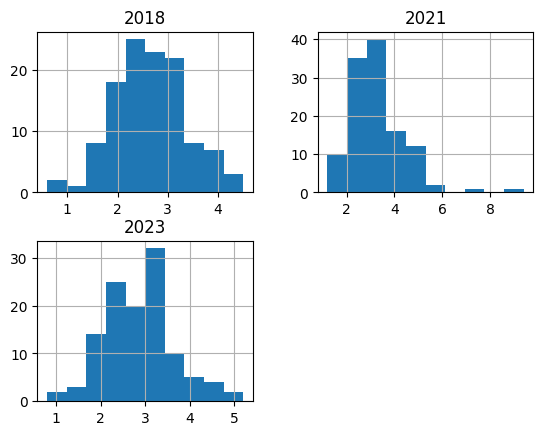

In [359]:
IEQ3 = pd.DataFrame({'2018': IE["Expenditure18"][9],
                     '2021': IE["Expenditure21"][9],
                     '2023': IE["Expenditure23"][9]})
IEQ3 = IEQ3.iloc[1:]
IEQ3 = IEQ3.apply(pd.to_numeric)
IEQ3.hist()